# Student Performance - Logistic Regression

Logistic regression is the statistical technique used to predict the relationship between predictors (our independent variables) and a predicted variable (the dependent variable) where the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). 

## Step 1: Gathering Data

The dataset we are using for this analysis can be found [here](https://archive.ics.uci.edu/ml/datasets/Student+Performance#). This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). But we are only using Mathematics dataset here. The attributes in this dataset is listed below.

##### Attributes student-mat.csv (Math course) dataset:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)

## Step 2: Analyse and prepare dataset

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import *
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
np.random.seed(0)

##### Load the dataset

In [54]:
data = pd.read_csv('StudentDB/student/student-mat.csv', sep=';')
pd.set_option('display.max_columns', 50)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


##### Missing values

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

##### Convert categorical data to numeric values

In [56]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [57]:
non_numeric_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']

data_numeric = data.copy()

data_numeric[non_numeric] = data_numeric[non_numeric].apply(LabelEncoder().fit_transform)

In [58]:
data_numeric.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


##### Define predicted variable (dependent variable)

We are trying to predict the performance of students based on various features like the school they go to, their sex, parental academic and professional status, etc. Column 'G3' represents the final grades of students. But if we go through the table above we can see that column 'G3' is non-binary. To fix this let's convert this data into two values:
- 1: equal to or greater than the average score 
- 0: less than the average score

In [59]:
mean_g3 = data_numeric['G3'].mean()
data_numeric['G3'] = np.where(data_numeric['G3']>=mean_g3, 1,0)

In [62]:
data_numeric['G3'].value_counts()

1    209
0    186
Name: G3, dtype: int64

##### Splitting dataset
The dataset is balanced. We can go ahead and split our dataset for training.

In [64]:
feature_cols = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2']

X = data_numeric[feature_cols] #Features
y = data_numeric.G3 #Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0, shuffle=True)

In [66]:
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
22,0,1,16,1,1,1,4,2,4,2,0,1,1,2,0,0,0,0,1,1,1,1,0,4,5,1,1,3,5,2,15,15
241,0,1,17,0,1,0,4,4,4,2,0,1,2,2,0,0,1,1,0,1,1,1,0,3,3,3,2,3,4,2,10,11
122,0,0,16,1,1,1,2,4,2,1,0,0,2,2,0,0,1,1,1,1,1,1,1,4,2,2,1,2,5,2,13,13
176,0,0,16,1,0,1,2,2,3,2,3,1,2,2,0,0,0,1,1,0,1,1,0,3,4,4,1,4,5,2,13,13
162,0,1,16,1,1,1,1,2,2,2,0,1,2,1,1,0,0,0,1,1,1,0,0,4,4,4,2,4,5,0,7,0


##### Standardize data

In [68]:
scale_orig = StandardScaler()

X_train = scale_orig.fit_transform(X_train)
y_train = y_train.ravel()
    
X_test = scale_orig.transform(X_test)
y_test = y_test.ravel()

## Step 3: Training and Evaluation

Since we have already chosen our model, let's start training our model.

In [171]:
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8907563025210085


We have achieved a fairly good accuracy score without tuning. Let's see if we can make the score better.

## Step 4: Hyper parameter tuning

In [178]:
grid = [{"C":[0.1, 1.0, 10], 
       "penalty":['l1', 'l2'], 
       "max_iter":[1000, 5000, 10000], 
       "solver":['liblinear']}]


logreg_cv = GridSearchCV(logreg, param_grid=grid, cv=5, scoring='accuracy')
logreg_cv.fit(X_train,y_train)
print("Tuned hpyerparameters (best parameters): ",logreg_cv.best_params_)
print("Accuracy :",logreg_cv.best_score_)

Tuned hpyerparameters (best parameters):  {'C': 1.0, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9240259740259742


In [179]:
logreg2 = LogisticRegression(C=1.0, max_iter=1000, 
                             penalty='l1', solver='liblinear', random_state=1)
logreg2.fit(X_train,y_train)
y_pred = logreg2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9159663865546218


##### Confusion matrix
A confusion matrix is a table that is used to define the performance of a classification algorithm.

In [191]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[57  9]
 [ 1 52]]


The result is telling us that we have 57+52 correct predictions and 9+1 incorrect predictions.

##### Classification report


In [189]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92        66
           1       0.85      0.98      0.91        53

    accuracy                           0.92       119
   macro avg       0.92      0.92      0.92       119
weighted avg       0.92      0.92      0.92       119



##### ROC Curve
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.

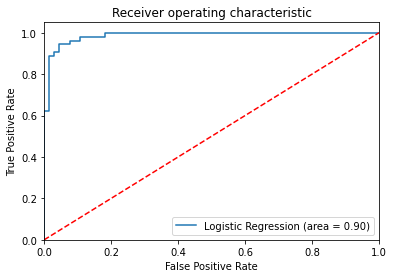

In [187]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

## Conclusion

In this project we used Logistic Regression model to predict student performance. To make the model accuracy better we performed standardization and hyperparameter tuning. The approach taken here allows us to find out the best hyperparameters for our dataset.